In [1]:
%load_ext autoreload

In [2]:
%autoreload 
import pathlib
import matplotlib.pyplot as plt
from ssd.config.defaults import cfg
from demo import run_demo

In [5]:
#config_file = "configs/vgg_ssd300_voc0712_tdt4265_server.yaml"
config_file = "configs/train_rdd2020_server.yaml"
ckpt = None # The path to the checkpoint for test, default is the latest checkpoint
score_threshold = 0.1
images_dir = "demo/rdd2020" # chage to "demo/mnist" for MNIST
dataset_type = "rdd2020" # change to "mnist" for MNIST.

cfg.merge_from_file(config_file)
cfg.freeze()

print("Loaded configuration file {}".format(config_file))
with open(config_file, "r") as cf:
    config_str = "\n" + cf.read()
print("Running with config:\n{}".format(cfg))

drawn_images = run_demo(
    cfg=cfg,ckpt=ckpt,
    score_threshold=score_threshold,
    images_dir=pathlib.Path(images_dir),
    output_dir=pathlib.Path(images_dir, "result"),
    dataset_type=dataset_type)


Predicting on images:   0%|          | 0/9 [00:00<?, ?it/s]

Loaded configuration file configs/train_rdd2020_server.yaml
Running with config:
DATASETS:
  TEST: ('rdd2020_val',)
  TRAIN: ('rdd2020_train',)
DATASET_DIR: /work/datasets
DATA_LOADER:
  NUM_WORKERS: 4
  PIN_MEMORY: True
EVAL_STEP: 500
INPUT:
  IMAGE_SIZE: [300, 300]
  PIXEL_MEAN: [123.675, 116.28, 103.53]
  PIXEL_STD: [1, 1, 1]
LOG_STEP: 10
MODEL:
  BACKBONE:
    INPUT_CHANNELS: 3
    NAME: basic
    OUT_CHANNELS: (128, 256, 128, 128, 64, 64)
    PRETRAINED: False
  CENTER_VARIANCE: 0.1
  NEG_POS_RATIO: 3
  NUM_CLASSES: 5
  PRIORS:
    ASPECT_RATIOS: [[2], [2, 3], [2, 3], [2, 3], [2], [2]]
    BOXES_PER_LOCATION: [4, 6, 6, 6, 4, 4]
    CLIP: True
    FEATURE_MAPS: [[38, 38], [19, 19], [10, 10], [5, 5], [3, 3], [1, 1]]
    MAX_SIZES: [[60, 60], [111, 111], [162, 162], [213, 213], [264, 264], [315, 315]]
    MIN_SIZES: [[30, 30], [60, 60], [111, 111], [162, 162], [213, 213], [264, 264]]
    STRIDES: [[8, 8], [16, 16], [32, 32], [64, 64], [100, 100], [300, 300]]
  SIZE_VARIANCE: 0.2
  TH

Predicting on images: 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]


Number of images: 9


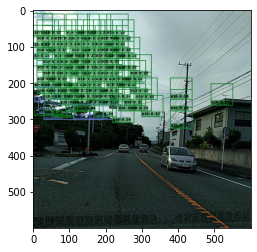

In [6]:
# Example to plot the first drawn image
print("Number of images:", len(drawn_images))
plt.imshow(drawn_images[0])

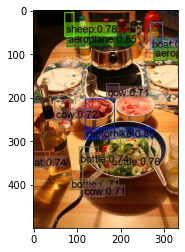

In [5]:
plt.imshow(drawn_images[1])